Phugoid Oscillation

Aircraft initially moving on straight line phugoid:
C=2/3, $\cos{\theta}=1$, and $z=z_t$

If aircrtaft experiences an upward acceleration of $-\frac{d^2z}{dt^2}$

Then Newton's second law in the vertical direction is
$$L-W=-\frac{W}{g}\frac{d^2z}{dt^2}$$

For ratio of Lift to weight:
$$\frac{L}{W}=\frac{\nu^2}{\nu_t^2}$$

Conservation of energy per unit mass: $\nu^2=2gz$ With:
$$\frac{d^2z}{dt^2}+\frac{gz}{z_t}=g$$

This equation is similiar to Hooke's Law $F=-kx$ where F is a restoring force, x is the displacement from a position of equilibrium and k is the spring constant. This results in following ODE:
$$\frac{d^2x}{dt^2}=-\frac{k}{m}x$$

which has solution: $x(t)Acos(\omega t - \phi)$ with angular frequency: $\omega = \sqrt{k/m}=2\pi f$ and phase angle $\phi$

We can immediately say what the period is for the oscillation: $2\pi\sqrt{z_tg}$ or in terms of trim velocity: $\pi\sqrt{2}\nu_t/g$

Prepare to integrate

Second Order ODE:
$$z(t)'' + \frac{gz(t)}{z_t}=g$$

We can turn the 2nd order equation into a system of two first orders:
$$z'(t)=b(t)$$
$$b'(t) = g(1-\frac{z(t)}{z_t})$$

Another way to look at a system of 2 ODES is to use vectors:
$$\vec{u}= \begin{pmatrix} z\\b \end{pmatrix}$$

And write differential system as single vector equatino
$$\vec{u}'(t)=\begin{pmatrix} b \\ g-g\frac{z(t)}{z_t} \end{pmatrix}$$

REMEMBER: u and f are vectors from here on out!

Discretization

In [105]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [106]:
T = 100
dt = 0.01
N = int(T/dt)+1
t = numpy.linspace(0.0, T,N)
#CHALLENGE PROBLEM!!!!!!!!!!!!!!!!!!!!!!!!!!!
t_1 = numpy.arange(0.0,T + dt, dt)
print(t)
print(t_1)

[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   9.99800000e+01
   9.99900000e+01   1.00000000e+02]
[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   9.99800000e+01
   9.99900000e+01   1.00000000e+02]


Euler's Method:

$$u_{n+1} = u_n + \Delta t f(u_n)$$

For the phugoid equation, Eluer's method gives:

$$z_{n+1} = z_n + \Delta t b_n$$
$$b_{n+1} = b_n + \Delta t (g-\frac{g}{z_t}z_n)$$


In [107]:
z0 = 100  #altitude
b0  = 10  #upward velocity from gust
zt = 100
g  = 9.81

u = numpy.array([z0, b0])

# initialize an array
z = numpy.zeros(N)
z[0] = z0  




In [108]:
def euler_method():
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]


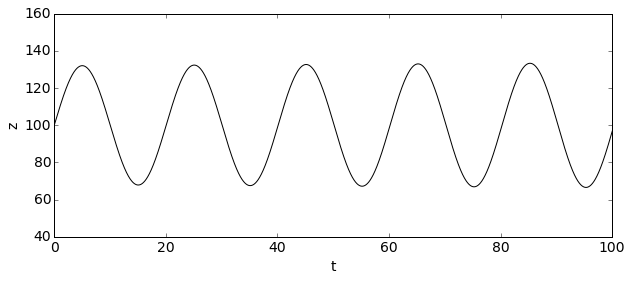

In [109]:
pyplot.figure(figsize=(10,4))   
pyplot.ylim(40,160)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('z', fontsize=14) 
pyplot.plot(t,z, 'k-');

Exact Solution

Second order phugoid oscillation:

$$z(t) = A\sin{\sqrt{\frac{g}{z_t}t}} + B\cos{\sqrt{\frac{g}{z_t}t}} + z_t $$

Where A and B are constants that we can solve with initial condition:
$$z(0) = z_0$$
$$b(0)=b_0$$

Applying these:
$$z(t) = b_0\sqrt(\frac{z_t}{g}\sin{\sqrt{\frac{g}{z_t}t}} + (z_0 - z_t)\cos{\sqrt{\frac{g}{z_t}t}} + z_t$$



Plot the Exact Solution

In [110]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
    (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

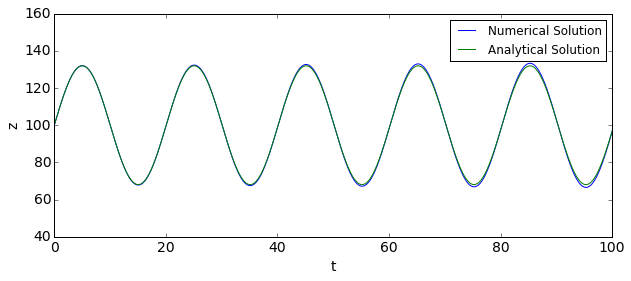

In [111]:
pyplot.figure(figsize=(10,4))   
pyplot.ylim(40,160)             
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.xlabel('t', fontsize=14) 
pyplot.ylabel('z', fontsize=14) 
pyplot.plot(t,z)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical Solution', 'Analytical Solution']);

Convergence

$$E = \Delta t \sum\limits_{n=0}^N | z(t_n) - z_n |$$
$$E=\int{|z-z_{exact}|dt}$$

In [112]:
dt_values = numpy.array([0.1,0.05,0.01,0.005,0.001,0.0001])
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
for i, dt in enumerate(dt_values):
    N=int(T/dt)+1
    t= numpy.linspace(0.0,T,N)
    
    u = numpy.array([z0,b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
euler_method()
        
        z_values[i] = z.copy()

In [117]:
def get_error(z,dt):
    N = len(z)
    t = numpy.linspace(0.0,T,N)
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
    (z0-zt)*numpy.cos((g/zt)**.5)+zt
    
    return dt*numpy.sum(numpy.abs(z-z_exact))

In [118]:
a = numpy.array([1,2,3])
b = numpy.array([4,4,4])
b-a


array([3, 2, 1])

In [119]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

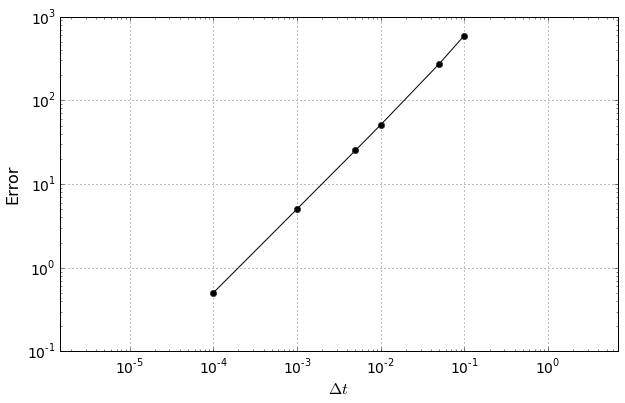

In [120]:
pyplot.figure(figsize=(10,6))        
pyplot.tick_params(axis='both', labelsize=14) 
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16) 
pyplot.ylabel('Error', fontsize=16) 
pyplot.loglog(dt_values, error_values, 'ko-')
pyplot.axis('equal')

Challenge: 
See euler_method function defined above!